In [1]:
%matplotlib inline
%run ../../import_envs.py

K = 3 # number of clusters
D = 2 # data point dimensions
NUM_HIDDEN_Z = 32
model_params = (K, D, NUM_HIDDEN_Z)
LOAD_VERSION = 'apg-new-systematic-9sweeps-5samples'
CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:0')

probtorch: 0.0+5a2c637 torch: 1.3.0


In [ ]:
# load test data
# test_sets = ['pts_20', 'pts_40', 'pts_60', 'pts_80', 'pts_100']
test_sets = ['pts_100']

DATAs = []
for s in test_sets:
    data = torch.from_numpy(np.load(DATA_DIR + 'gmm/test/' + s + '/' + 'ob.npy')).float() ## load testing datasets
    DATAs.append(data)
## load the weights
# from apg_modeling_neural import init_model
from apg_modeling import init_model

model = init_model(model_params=model_params, 
                   CUDA=CUDA, 
                   DEVICE=DEVICE, 
                   LOAD_VERSION=LOAD_VERSION,
                   LR=None)

In [ ]:
## visualize samples
%run ../hybrid_testing.py
from viz import viz_samples

APG_SWEEPS_TEST = 300
SAMPLE_SIZE_TEST = 100
DATA_PTR = 4
FLAGs = {'hmc' : True, 'apg' : False, 'gibbs' : False, 'bps' : False}
SAVE_NAME = 'samples-%d' % DATA_PTR

datas = sample_data_uniform(DATAs=DATAs, 
                            data_ptr=DATA_PTR)


# metrics = test_hybrid_all(model=model, 
#                           flags=FLAGs,
#                           DATA=DATAs[0], 
#                           batch_size=100,
#                           sample_size=SAMPLE_SIZE_TEST, 
#                           apg_sweeps=APG_SWEEPS_TEST,
#                           hmc_num_steps=APG_SWEEPS_TEST, 
#                           leapfrog_step_size=1e-1, 
#                           leapfrog_num_steps=1,
#                           filename='test',
#                           CUDA=CUDA, 
#                           DEVICE=DEVICE)

for i in range(10):
    test_hybrid(model=model, 
                flags=FLAGs,
                  datas=datas, 
                  sample_size=SAMPLE_SIZE_TEST, 
                  apg_sweeps=APG_SWEEPS_TEST,
                  hmc_num_steps=APG_SWEEPS_TEST, 
                  leapfrog_step_size=1e-1, 
                  leapfrog_num_steps=1,
                  filename='hmc1x_%s' % (i),
                  CUDA=CUDA, 
                  DEVICE=DEVICE)
    print("run=%d completed" % i)

In [ ]:
torch.Tensor(metrics['hmc']).mean()

In [ ]:
import matplotlib.pyplot as plt
flags = FLAGs
filename = 'test'
fs = 8 
fs_title = 14
lw = 4
if flags['apg']:
    log_joint_apg = np.load('log_joint_apg_%s.npy' % (filename))
    apg_mean = log_joint_apg.mean(1)

if flags['hmc']:
    log_joint_hmc = np.load('log_joint_hmc_%s.npy' % (filename))
    hmc_mean = log_joint_hmc.mean(1)


if flags['gibbs']:
    log_joint_gibbs = np.load('log_joint_gibbs_%s.npy' % (filename))
    gibbs_mean = log_joint_gibbs.mean(1)
        
fig = plt.figure(figsize=(fs*2.5,fs)) 
ax = fig.add_subplot(111)
ax.plot(hmc_mean, label='hmc')
# ax.plot(gibbs_mean, label='gibbs')
ax.legend()

In [3]:
60+15+16+20+25+9+17+11+55

228

In [ ]:
test = np.load('log_joint_hmc_hmc1x_0.npy').mean(1)

In [ ]:
HMC1x = []
for i in range(3):
    log_joint_apg = np.load('log_joint_hmc_hmc1x_%s.npy' % (i))
    HMC1x.append(log_joint_apg.mean(1)[None, :])
HMC1x = np.concatenate(HMC1x, 0)
np.save('log_joint_hmc1x_3runs', HMC1x)

In [ ]:
APG = []
HMC5x = []
GIBBS = []
HMC10x = []
BPS100x = []
for i in range(10):
    if flags['apg']:
        log_joint_apg = np.load('log_joint_apg_%s_%s.npy' % (filename, i))
        APG.append(log_joint_apg.mean(1)[None, :])

    if flags['hmc']:
        log_joint_hmc = np.load('log_joint_hmc_%s_%s.npy' % (filename, i))
        HMC5x.append(log_joint_hmc.mean(1)[None, :])


    if flags['gibbs']:
        log_joint_gibbs = np.load('log_joint_gibbs_%s_%s.npy' % (filename, i))
        GIBBS.append(log_joint_gibbs.mean(1)[None, :])
        

# APG = np.concatenate(APG, 0)        
# HMC5x = np.concatenate(HMC5x, 0)
# GIBBS = np.concatenate(GIBBS, 0)
# np.save('log_joint_apg_10runs', APG)     
# np.save('log_joint_hmc5x_10runs', HMC5x)            
# np.save('log_joint_gibbs_10runs', GIBBS)            

# HMC10x = np.concatenate(HMC10x, 0)
# np.save('log_joint_hmc10x_10runs', HMC10x)            


# apg_std = log_joint_apg.std(1)
# ax.plot(apg_mean, c=COLORS[0], label='APG')

# hmc_std = log_joint_hmc.std(1)
# ax.plot(hmc_mean, c=COLORS[1], label='HMC')
# gibbs_std = log_joint_gibbs.std(1)
# ax.plot(gibbs_mean, c=COLORS[2], label='Gibbs')        

    if flags['bps']:
        log_joint_bps = np.load('log_joint_bps_%s_%s.npy' % (filename, i))
        BPS100x.append(log_joint_bps.mean(1)[None, :])
        
BPS100x = np.concatenate(BPS100x, 0)
np.save('log_joint_bps100x_10runs', BPS100x)
#         ax.plot(gibbs_mean, c=COLORS[3], label='BPS')  
# ax.legend(fontsize=20)

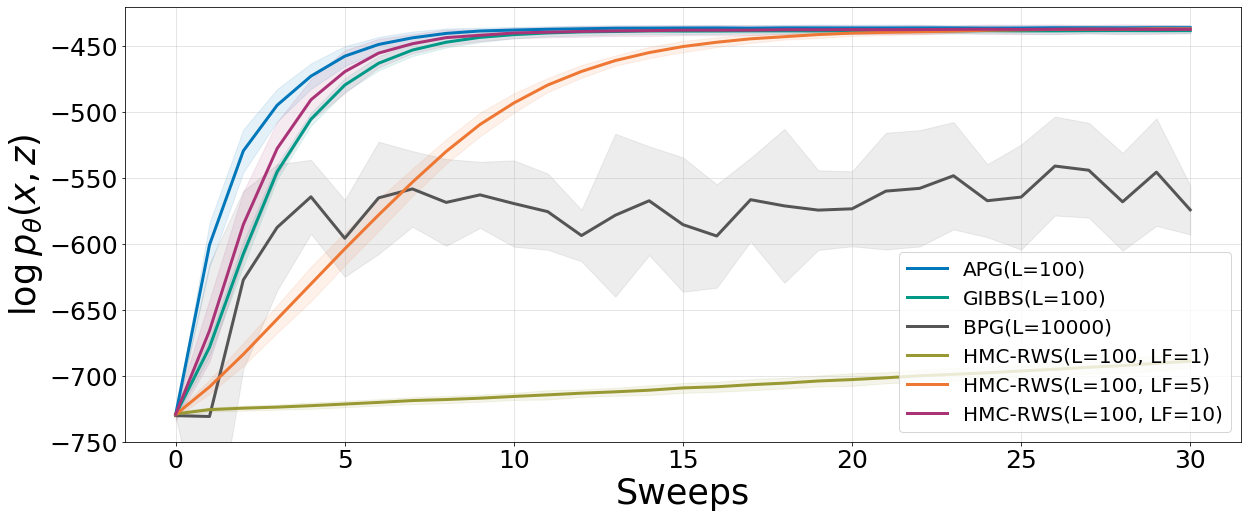

In [7]:
import matplotlib.pyplot as plt
fs = 8 
fs_title = 14
lw = 3
filename='bps100x'
# flags = FLAGs
OPACITY = 0.1
fig = plt.figure(figsize=(fs*2.5,fs)) 
ax = fig.add_subplot(111)
COLORS = ['#0077BB', '#009988', '#EE7733', '#AA3377', '#555555', '#999933']
lw = lw
fs_title= fs_title
APG = np.load('log_joint_apg_10runs.npy')
APG_mean = APG.mean(0)
APG_std = APG.std(0)
GIBBS = np.load('log_joint_gibbs_10runs.npy')
GIBBS_mean = GIBBS.mean(0)
GIBBS_std = GIBBS.std(0)
HMC5x = np.load('log_joint_hmc5x_10runs.npy')
HMC5x_mean = HMC5x.mean(0)
HMC5x_std = HMC5x.std(0)
HMC10x = np.load('log_joint_hmc10x_10runs.npy')
HMC10x_mean = HMC10x.mean(0)
HMC10x_std = HMC10x.std(0)
BPS100x = np.load('log_joint_bps100x_10runs.npy')
BPS100x_mean = BPS100x.mean(0)
BPS100x_std = BPS100x.std(0)

HMC1x = np.load('log_joint_hmc1x_10runs.npy')
HMC1x_mean = HMC1x.mean(0)
HMC1x_std = HMC1x.std(0)


Ts = np.arange(31)

ax.plot(APG_mean[:31], linewidth=lw, c=COLORS[0], label='APG(L=100)')
ax.fill_between(Ts, APG_mean[:31]-APG_std[:31], APG_mean[:31]+APG_std[:31], color=COLORS[0], alpha=OPACITY)

ax.plot(GIBBS_mean[:31], linewidth=lw, c=COLORS[1], label='GIBBS(L=100)')
ax.fill_between(Ts, GIBBS_mean[:31]-GIBBS_std[:31]*2, GIBBS_mean[:31]+GIBBS_std[:31]*2, color=COLORS[1], alpha=OPACITY)

ax.plot(BPS100x_mean[:31], linewidth=lw, c=COLORS[4], label='BPG(L=10000)')
ax.fill_between(Ts, BPS100x_mean[:31]-BPS100x_std[:31], BPS100x_mean[:31]+BPS100x_std[:31], color=COLORS[4], alpha=OPACITY)


ax.plot(HMC1x_mean, linewidth=lw, c=COLORS[5], label='HMC-RWS(L=100, LF=1)')
ax.fill_between(Ts, HMC1x_mean[:31]-HMC1x_std[:31]*2, HMC1x_mean[:31]+HMC1x_std[:31]*2, color=COLORS[5], alpha=OPACITY)
ax.plot(HMC5x_mean[:31], linewidth=lw, c=COLORS[2], label='HMC-RWS(L=100, LF=5)')
ax.fill_between(Ts, HMC5x_mean[:31]-HMC5x_std[:31]*2, HMC5x_mean[:31]+HMC5x_std[:31]*2, color=COLORS[2], alpha=OPACITY)
ax.plot(HMC10x_mean[:31], linewidth=lw, c=COLORS[3], label='HMC-RWS(L=100, LF=10)')
ax.fill_between(Ts, HMC10x_mean[:31]-HMC10x_std[:31]*4, HMC10x_mean[:31]+HMC10x_std[:31]*4, color=COLORS[3], alpha=OPACITY)


ax.legend(fontsize=20, loc='lower right')
ax.tick_params(labelsize=25)
ax.set_xlabel('Sweeps', fontsize=35)
ax.set_ylabel(r'$\log \: p_\theta(x, z)$', fontsize=35)
ax.grid(alpha=0.4)
ax.set_ylim([-750, -420])
plt.savefig('convergence_gmm_30updates.svg', dpi=300)

In [ ]:
log_joint_hmc = np.load('log_joint_hmc_%s.npy' % 1)
hmc_mean = log_joint_hmc.mean(1)
plt.plot(hmc_mean)

In [ ]:
APG.shape
